In [1]:
import fiona
import geopandas as gpd
import shapely
import numpy

In [2]:
import pandas as pd

In [18]:
lakes = {'Cedar Lake':[-93.32295119774095, 44.96157921686313], 'Bde Maka Ska':[-93.30630004421299, 44.94888479428342], 'Lake of the Isles':[-93.30733001246776, 44.95265089674996]}

In [25]:
lakelines = [(-93.32295119774095, 44.96157921686313), (-93.30630004421299, 44.94888479428342), (-93.30733001246776, 44.95265089674996)]

In [3]:
d = {'name': ['cedar', 'bde', 'isles'], 'lat': [44.96157921686313, 44.94888479428342, 44.95265089674996], 'lng': [-93.32295119774095, -93.30630004421299, -93.30733001246776]}

In [4]:
d

{'name': ['cedar', 'bde', 'isles'],
 'lat': [44.96157921686313, 44.94888479428342, 44.95265089674996],
 'lng': [-93.32295119774095, -93.30630004421299, -93.30733001246776]}

In [5]:
lakes= pd.DataFrame(data=d)
lakes

,name,lat,lng
0,cedar,44.961579,-93.322951
1,bde,44.948885,-93.306300
2,isles,44.952651,-93.307330


In [8]:
from shapely.geometry import Polygon

In [9]:
lakes1= Polygon( [[-93.322951, 44.961579], [-93.306300, 44.948885], [-93.307330, 44.952651]])
lakes2= Polygon( [(-93.322951, 44.961579), (-93.306300, 44.948885), (-93.307330, 44.952651)])

print(lakes1.wkt)
print(lakes2.wkt)

POLYGON ((-93.322951 44.961579, -93.3063 44.948885, -93.30733 44.952651, -93.322951 44.961579))
POLYGON ((-93.322951 44.961579, -93.3063 44.948885, -93.30733 44.952651, -93.322951 44.961579))


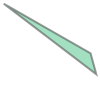

In [10]:
lakes1

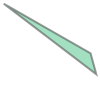

In [11]:
lakes2

In [12]:
from shapely.geometry import LineString

In [13]:
lakesline= LineString( [[-93.322951, 44.961579], [-93.306300, 44.948885], [-93.307330, 44.952651]])

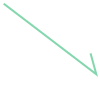

In [14]:
lakesline

In [15]:
from shapely.geometry import MultiPoint

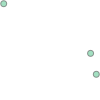

In [16]:
lakespoints= MultiPoint( [[-93.322951, 44.961579], [-93.306300, 44.948885], [-93.307330, 44.952651]])
lakespoints

In [29]:
#create geometries from the original dataframe with coordinates
lakes_gdf = gpd.GeoDataFrame(
    lakes, geometry=gpd.points_from_xy(lakes.lng, lakes.lat))

In [30]:
print(lakes_gdf.head())

    name        lat        lng                    geometry
0  cedar  44.961579 -93.322951  POINT (-93.32295 44.96158)
1    bde  44.948885 -93.306300  POINT (-93.30630 44.94888)
2  isles  44.952651 -93.307330  POINT (-93.30733 44.95265)


In [36]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\laure\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


NameError: name 'plt' is not defined

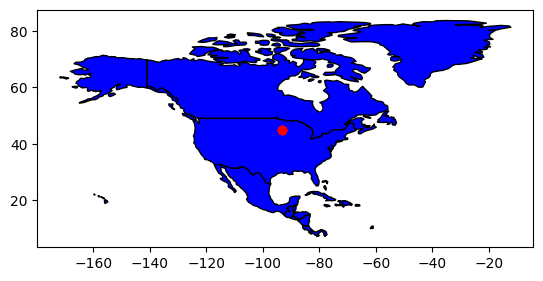

In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax= world[world.continent == 'North America'].plot(
    color='blue', edgecolor='black')

lakes_gdf.plot(ax=ax, color='red')
plt.show()

In [44]:
def state_plotter(states, us_map=True):
    fig, ax1= plt.subplots(figsize=(30,30))
state_plotter

<function __main__.state_plotter(states, us_map=True)>

In [48]:
series = gpd.GeoSeries([lakespoints, lakesline, lakes2], crs='EPSG:4326')

<Axes: >

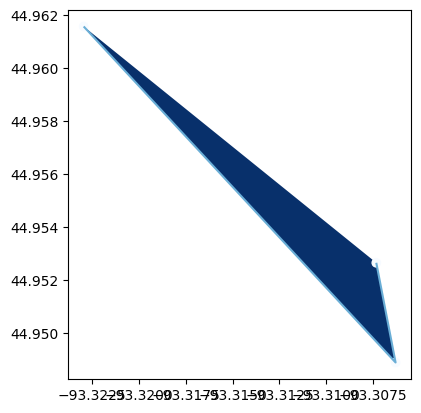

In [49]:
series.plot(cmap='Blues')

In [50]:
lakes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      3 non-null      object  
 1   lat       3 non-null      float64 
 2   lng       3 non-null      float64 
 3   geometry  3 non-null      geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 224.0+ bytes


In [51]:
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [55]:
#convert geodataframe to shapefile
lakes_gdf.to_file(filename='lakes.shp', driver='ESRI Shapefile')

In [56]:
#convert to geopackage
lakes_gdf.to_file(filename='lakesPCKG.gpkg', driver='GPKG', layer='name')

In [57]:
#convert to geojson
lakes_gdf.to_file(filename='lakesgjson.geojson', driver='GeoJSON')